# HTSPC- Hate Speech Classification on social media

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation,Dropout,Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.text import Tokenizer
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation,Dropout , Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.layers import Dense, Dropout, Embedding, LSTM 
from keras.datasets import imdb 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read train data
train = pd.read_csv('/content/drive/MyDrive/Dataset/train_f5.csv')

In [ ]:
train.head()
# print(train)

,id,label,tweet
0,1,0,@steve_mit15 when a father is dysfunctional an...
1,2,1,"RT ""@arodd_15 : All gays niggas need a bullet ..."
2,3,0,@robert_6784 checkout this game that i bought...
3,4,1,this is awful! just slap on the face to #ameri...
4,5,1,these #black people need to be erased of eah''...


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27031 entries, 0 to 27030
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      27031 non-null  int64 
 1   label   27031 non-null  int64 
 2   tweet   27031 non-null  object
dtypes: int64(2), object(1)
memory usage: 633.7+ KB


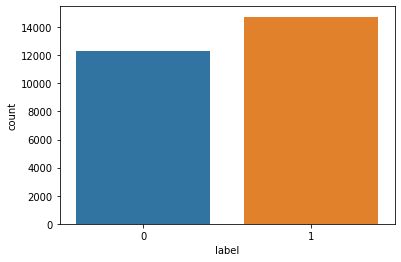

In [ ]:
import seaborn as sns
sns.countplot(x='label',data=train)

# Processing the comments/tweets

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
import re

In [ ]:
def remove_urls(tweet):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', str(tweet))

train["tweet_w/o_url"] = train["tweet"].apply(lambda tweet: remove_urls(tweet))

In [ ]:
train.head()

,id,label,tweet,tweet_w/o_url
0,1,0,@steve_mit15 when a father is dysfunctional an...,@steve_mit15 when a father is dysfunctional an...
1,2,1,"RT ""@arodd_15 : All gays niggas need a bullet ...","RT ""@arodd_15 : All gays niggas need a bullet ..."
2,3,0,@robert_6784 checkout this game that i bought...,@robert_6784 checkout this game that i bought
3,4,1,this is awful! just slap on the face to #ameri...,this is awful! just slap on the face to #ameri...
4,5,1,these #black people need to be erased of eah''...,these #black people need to be erased of eah''...


##  Step  to remove all the special characters like '$,#,&,etc'

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#train['tweet_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',tweet)) for tweet in lis]) for lis in train['tweet_w/o_url']]
train['tweet_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',tweet)) for tweet in lis]) for lis in train['tweet_w/o_url']]

In [ ]:
train.head()

,id,label,tweet,tweet_w/o_url,tweet_lem
0,1,0,@steve_mit15 when a father is dysfunctional an...,@steve_mit15 when a father is dysfunctional an...,steve mit when a father is dysfunctional an...
1,2,1,"RT ""@arodd_15 : All gays niggas need a bullet ...","RT ""@arodd_15 : All gays niggas need a bullet ...",RT arodd All gays niggas need a bullet ...
2,3,0,@robert_6784 checkout this game that i bought...,@robert_6784 checkout this game that i bought,robert checkout this game that i bought
3,4,1,this is awful! just slap on the face to #ameri...,this is awful! just slap on the face to #ameri...,this is awful just slap on the face to ameri...
4,5,1,these #black people need to be erased of eah''...,these #black people need to be erased of eah''...,these black people need to be erased of eah ...


In [ ]:
train=train.drop(["tweet","tweet_w/o_url"],axis=1)

In [ ]:
train.head()

,id,label,tweet_lem
0,1,0,steve mit when a father is dysfunctional an...
1,2,1,RT arodd All gays niggas need a bullet ...
2,3,0,robert checkout this game that i bought
3,4,1,this is awful just slap on the face to ameri...
4,5,1,these black people need to be erased of eah ...


## Step  to remove the stop words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print('The following are the stop words in English Language :')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

The following are the stop words in English Language :


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
train.head()

,id,label,tweet_lem
0,1,0,steve mit when a father is dysfunctional an...
1,2,1,RT arodd All gays niggas need a bullet ...
2,3,0,robert checkout this game that i bought
3,4,1,this is awful just slap on the face to ameri...
4,5,1,these black people need to be erased of eah ...


In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(tweet):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(tweet).split() if word not in STOPWORDS])

train["tweet_w/o_stop"] = train["tweet_lem"].apply(lambda tweet: remove_stopwords(tweet))


In [ ]:
train.head()

,id,label,tweet_lem,tweet_w/o_stop
0,1,0,steve mit when a father is dysfunctional an...,steve mit father dysfunctional selfish drags k...
1,2,1,RT arodd All gays niggas need a bullet ...,RT arodd All gays niggas need bullet put head ...
2,3,0,robert checkout this game that i bought,robert checkout game bought
3,4,1,this is awful just slap on the face to ameri...,awful slap face americans hey neighbor black b...
4,5,1,these black people need to be erased of eah ...,black people need erased eah surface scumbag


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train['tweet_w/o_stop'],train['label'],test_size=0.2,random_state=1)
print(X_train)

9173     user years mostly arrogant abusive discriminat...
25691    user user metrics ya cowboy user stop fakenews...
23535                                  black people racist
5800     Because Bills world always right everyone else...
516                 I want Chinese people living next door
                               ...                        
10955                I differentiate white man white chair
17289    Statistically proven refugees die coronavirus ...
5192                leave gweh longer debate wypipo slaver
12172    merger rku skv taking effect updated twitter p...
235                                  foreigners never wash
Name: tweet_w/o_stop, Length: 21624, dtype: object


In [ ]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
x_train = tokenizer.texts_to_sequences(X_train)
#Finally, to convert sentences to their numeric counterpart, call the texts_to_sequences function and pass it the whole corpus.
x_test =  tokenizer.texts_to_sequences(X_test)

In [ ]:
print(x_train)

[[2, 110, 3958, 6183, 1726, 6184, 18, 76, 5154, 11333, 127, 173], [2, 2, 11334, 949, 3578, 2, 59, 3280, 71, 876, 11335], [7, 3, 208], [1087, 3579, 33, 121, 55, 16, 102, 11336, 6185, 576, 1252, 11337, 877, 17, 43, 11338, 11339, 151, 4447, 58, 1, 6186, 11340, 514, 97, 7794, 255, 6187, 2811, 20, 620, 321, 209, 5155, 97, 6188, 3580, 2812, 30, 3033, 11341, 20, 1931, 690, 4448, 2434, 106, 38, 3, 75, 2813, 148, 318, 4449, 5156, 2162, 584, 4450, 395, 53, 3, 251, 343, 1511, 1512, 1727, 384, 680, 950, 2814, 75, 384, 680, 193, 3959, 11342, 178, 7795, 1932, 1823, 2814, 27, 75, 160, 646, 11343, 530, 54, 6189, 3581, 188, 2289, 327, 395, 2815, 3, 294, 3034, 1513, 410, 951, 1932, 77, 3, 29, 1511, 395, 58, 3582, 7796, 727, 3, 20, 49, 76, 63, 1640, 2290, 1162, 15, 1341, 224, 577, 252, 11344, 20, 29, 972, 950, 49, 193, 354, 1514, 1515, 1824, 221, 11345, 2816, 1444, 595, 414, 854, 2163, 5157, 1825, 11346, 2164, 727, 3583, 743, 4451, 34, 25, 112, 3960, 3584, 1087, 950, 3, 662, 6190, 3035, 98, 2604, 972, 44

In [ ]:
print(len(x_train)) 
print(len(x_test))

21624
5407


In [ ]:

vocab_size = len(tokenizer.word_index)+1
x_train=pad_sequences(x_train,padding='post',maxlen=90)
x_test=pad_sequences(x_test,padding='post',maxlen=90)
print(vocab_size)

27091


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
from sklearn.preprocessing import MinMaxScaler #fixed import
sc_X = MinMaxScaler()
x1_train = sc_X.fit_transform(x_train)
x1_test = sc_X.transform(x_test)

In [ ]:
# vect = TfidfVectorizer().fit(X_train)

In [ ]:
# vect_transformed_X_train = vect.transform(X_train)
# vect_transformed_X_test = vect.transform(X_test)

# Classifing the data using the following algorithms

## Using SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
modelSVC = SVC(kernel='linear').fit(x1_train,y_train)
print(y_train)

9173     1
25691    1
23535    1
5800     0
516      1
        ..
10955    1
17289    1
5192     1
12172    0
235      1
Name: label, Length: 21624, dtype: int64


In [ ]:
print(y_train.shape)

(21624,)


In [ ]:
predictionsSVC = modelSVC.predict(x1_test)
x=accuracy_score(y_test,predictionsSVC)
print(x)
print(classification_report(y_test,predictionsSVC))

0.6323284631033845
              precision    recall  f1-score   support

           0       0.72      0.32      0.45      2475
           1       0.61      0.89      0.72      2932

    accuracy                           0.63      5407
   macro avg       0.66      0.61      0.59      5407
weighted avg       0.66      0.63      0.60      5407



Text(0.5, 1.0, 'Confusion Matrix')

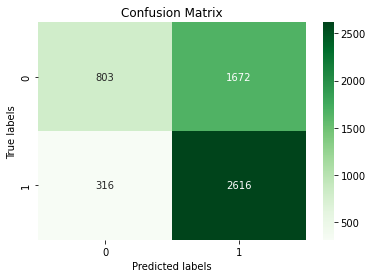

In [ ]:
cm_km1 = confusion_matrix(y_test, predictionsSVC)

ax = plt.subplot()
sns.heatmap(cm_km1, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 

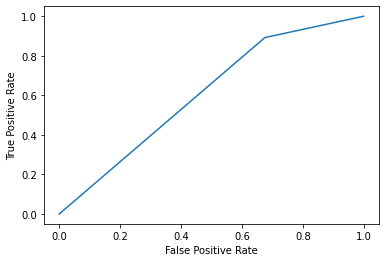

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,predictionsSVC)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
modelSVC2 = SVC(kernel='rbf').fit(x1_train,y_train)

In [ ]:
predictionsSVC2 = modelSVC2.predict(x1_test)
x=accuracy_score(y_test,predictionsSVC2)
print(x)
print(classification_report(y_test,predictionsSVC2))
# y=f1_score(y_test,predictionsSVC2)
# z=precision_score(y_test,predictionsSVC2)
# r=recall_score(y_test,predictionsSVC2)

0.6515627889772517
              precision    recall  f1-score   support

           0       0.70      0.42      0.53      2475
           1       0.63      0.85      0.72      2932

    accuracy                           0.65      5407
   macro avg       0.67      0.63      0.63      5407
weighted avg       0.66      0.65      0.63      5407



Text(0.5, 1.0, 'SVM Confusion Matrix')

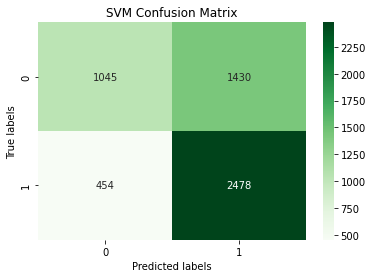

In [ ]:
cm_km1 = confusion_matrix(y_test, predictionsSVC2)

ax = plt.subplot()
sns.heatmap(cm_km1, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 

## Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression().fit(x1_train,y_train)

In [ ]:
predictionsLR = modelLR.predict(x1_test)
x=accuracy_score(y_test,predictionsLR)
print(x)
print(classification_report(y_test,predictionsLR))

0.6384316626595155
              precision    recall  f1-score   support

           0       0.72      0.35      0.47      2475
           1       0.62      0.88      0.73      2932

    accuracy                           0.64      5407
   macro avg       0.67      0.62      0.60      5407
weighted avg       0.66      0.64      0.61      5407



Text(0.5, 1.0, 'LR Confusion Matrix')

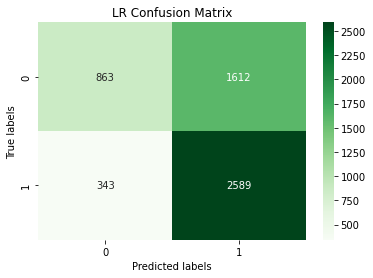

In [ ]:
cm_km1 = confusion_matrix(y_test, predictionsLR)

ax = plt.subplot()
sns.heatmap(cm_km1, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('LR Confusion Matrix') 

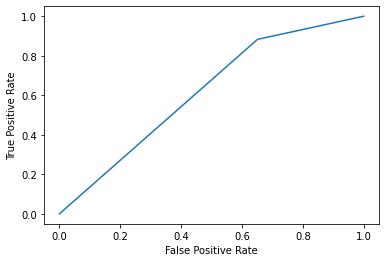

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,predictionsLR)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Using Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
modelNB = MultinomialNB(alpha=1).fit(x1_train,y_train)

In [ ]:
predictionsNB = modelNB.predict(x1_test)
x=accuracy_score(y_test,predictionsNB)
print(x)
print(classification_report(y_test,predictionsNB))

0.5768448307749214
              precision    recall  f1-score   support

           0       0.79      0.10      0.18      2475
           1       0.56      0.98      0.71      2932

    accuracy                           0.58      5407
   macro avg       0.68      0.54      0.45      5407
weighted avg       0.67      0.58      0.47      5407



Text(0.5, 1.0, 'Naives Bayes Confusion Matrix')

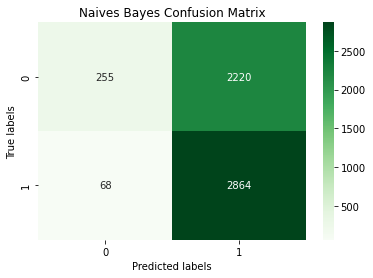

In [ ]:
cm_km1 = confusion_matrix(y_test, predictionsNB)

ax = plt.subplot()
sns.heatmap(cm_km1, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naives Bayes Confusion Matrix') 

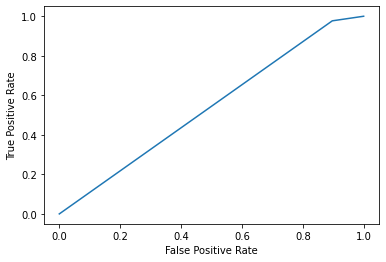

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,predictionsNB)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Using RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelRF = RandomForestClassifier(n_estimators=127).fit(x1_train,y_train)

In [ ]:
predictionsRF = modelRF.predict(x1_test)
x=accuracy_score(y_test,predictionsRF)
print(x)
print(classification_report(y_test,predictionsRF))

0.7616053264287035
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2475
           1       0.78      0.78      0.78      2932

    accuracy                           0.76      5407
   macro avg       0.76      0.76      0.76      5407
weighted avg       0.76      0.76      0.76      5407



Text(0.5, 1.0, 'Random forest Confusion Matrix')

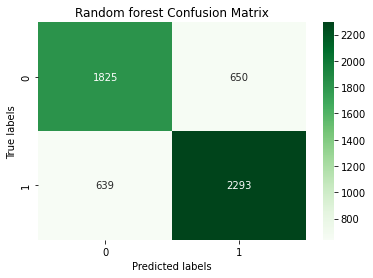

In [ ]:
cm_km1 = confusion_matrix(y_test, predictionsRF)

ax = plt.subplot()
sns.heatmap(cm_km1, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random forest Confusion Matrix') 

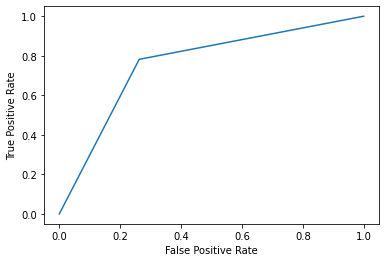

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,predictionsRF)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=10)

# Train Decision Tree Classifier
clf = clf.fit(x1_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.6833734048455705
              precision    recall  f1-score   support

           0       0.70      0.54      0.61      2475
           1       0.67      0.81      0.73      2932

    accuracy                           0.68      5407
   macro avg       0.69      0.67      0.67      5407
weighted avg       0.69      0.68      0.68      5407



# Using **CNN**

In [ ]:
print(tokenizer.word_index)

{'i': 1, 'user': 2, 'people': 3, 'newline': 4, 'love': 5, 'like': 6, 'black': 7, 'n': 8, 'trump': 9, 'xa': 10, 'think': 11, 'women': 12, 'u': 13, 'fucking': 14, 'get': 15, 'everyone': 16, 'the': 17, 'amp': 18, 'want': 19, 'would': 20, 'one': 21, 'country': 22, 'day': 23, 'white': 24, 'know': 25, 'go': 26, 'really': 27, 'biden': 28, 'see': 29, 'it': 30, 'time': 31, 'good': 32, 'world': 33, 'you': 34, 'happy': 35, 'feel': 36, 'today': 37, 'many': 38, 'need': 39, 'bidenharris': 40, 'us': 41, 'new': 42, 'man': 43, 'wrong': 44, 'life': 45, 'joe': 46, 'already': 47, 'much': 48, 'make': 49, 'getting': 50, 'let': 51, 'xc': 52, 'tell': 53, 'never': 54, 'right': 55, 'nothing': 56, 'back': 57, 'say': 58, 'stop': 59, 'muslims': 60, 'woman': 61, 'take': 62, 'look': 63, 'anyone': 64, 'x': 65, 'way': 66, 'we': 67, 'shit': 68, 'kamala': 69, 'around': 70, 'hate': 71, 'men': 72, 'come': 73, 'vote': 74, 'going': 75, 'even': 76, 'work': 77, 'nice': 78, 'live': 79, 'president': 80, 'this': 81, 'best': 82, 

In [ ]:
print(x_train)

[[    2   110  3958 ...     0     0     0]
 [    2     2 11334 ...     0     0     0]
 [    7     3   208 ...     0     0     0]
 ...
 [  127  6406   629 ...     0     0     0]
 [11332   688  2784 ...     0     0     0]
 [  187    54  1876 ...     0     0     0]]


In [ ]:
print(y_test)

3832     1
19238    0
4036     1
11497    1
619      1
        ..
23593    1
4613     0
16269    1
23707    0
13912    1
Name: label, Length: 5407, dtype: int64


In [ ]:
from keras.models import Model
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input
import numpy as np
from tensorflow.keras import regularizers

In [ ]:
model = Sequential()

embedding_layer=Embedding(vocab_size, 100, input_length=90) #,embeddings_regularizer =regularizers.l2(0.0005)
model.add(embedding_layer);
model.add(Conv1D(filters=64, kernel_size=5, activation='relu')) #,kernel_regularizer = regularizers.l2(0.0005),bias_regularizer = regularizers.l2(0.0005)
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Flatten())
#model.add(Dense(3, activation='relu',kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001))) #
model.add(Dense(1, activation='sigmoid')) #,kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001)
model.compile(optimizer='adam',loss='binary_crossentropy' , metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 90, 100)           2709100   
                                                                 
 conv1d (Conv1D)             (None, 86, 64)            32064     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                        

In [ ]:
# fit network
history=model.fit(x_train,y_train,epochs=4,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/4
136/136 [==============================] - 15s 98ms/step - loss: 0.4335 - accuracy: 0.8095 - val_loss: 0.2401 - val_accuracy: 0.8983
Epoch 2/4
136/136 [==============================] - 17s 126ms/step - loss: 0.1563 - accuracy: 0.9425 - val_loss: 0.2229 - val_accuracy: 0.9114
Epoch 3/4
136/136 [==============================] - 13s 98ms/step - loss: 0.0714 - accuracy: 0.9760 - val_loss: 0.2430 - val_accuracy: 0.9124
Epoch 4/4
136/136 [==============================] - 13s 98ms/step - loss: 0.0343 - accuracy: 0.9906 - val_loss: 0.2781 - val_accuracy: 0.9108


In [ ]:
# evaluate
loss, acc = model.evaluate(x_test, y_test)
#A["CNN"]=acc
print('Test Accuracy: %f' % (acc*100))

169/169 [==============================] - 1s 6ms/step - loss: 0.2740 - accuracy: 0.9188
Test Accuracy: 91.880894


In [ ]:
print(x_test)
print(x_test[0])
print(x_test[0].ndim)

[[ 355 2319    0 ...    0    0    0]
 [   2  667  458 ...    0    0    0]
 [   1  997  247 ...    0    0    0]
 ...
 [   1  386 2544 ...    0    0    0]
 [ 180   23 1130 ...    0    0    0]
 [1240   14  189 ...    0    0    0]]
[ 355 2319    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
1


In [ ]:
y_predict=model.predict(np.expand_dims(x_test[0],axis=0)).round(2)
#y_predict=model.predict(x_test).round(2)
y_predict

array([[1.]], dtype=float32)

In [ ]:
y_predict=(model.predict(x_test).round(2)>=0.50).astype(int)
print(y_predict)
print(len(y_predict))

[[1]
 [0]
 [1]
 ...
 [1]
 [0]
 [1]]
5407


In [ ]:
print(y_test)

3832     1
19238    0
4036     1
11497    1
619      1
        ..
23593    1
4613     0
16269    1
23707    0
13912    1
Name: label, Length: 5407, dtype: int64


In [ ]:
print(accuracy_score(y_test,y_predict))

0.9186240059182541


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2475
           1       0.93      0.92      0.92      2932

    accuracy                           0.92      5407
   macro avg       0.92      0.92      0.92      5407
weighted avg       0.92      0.92      0.92      5407



## Testing with external data

In [ ]:
t=['this is tweet']
t=tokenizer.texts_to_sequences(t)
t=pad_sequences(t,padding='post',maxlen=90)
print(t)

[[ 81 194 801   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [ ]:
print((model.predict(t).round(2)>=0.50).astype(int))

[[0]]


# confusion metrix

Text(0.5, 1.0, 'CNN Confusion Matrix')

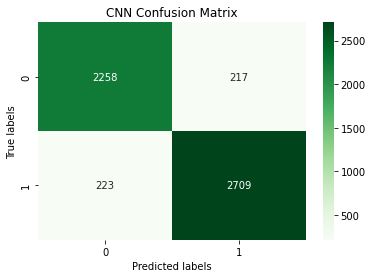

In [ ]:
from sklearn.metrics import confusion_matrix
cm_km1 = confusion_matrix(y_test, y_predict)

ax = plt.subplot()
sns.heatmap(cm_km1, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('CNN Confusion Matrix') 

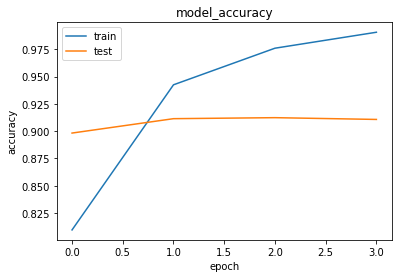

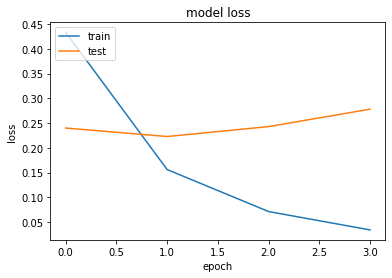

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# labels=['Non-Hate','Hate']
# print(classification_report(y_test,y_test,labels=labels))

## CNN with LSTM

In [ ]:
embed_dim =100
model1=Sequential()
embedding_layer=Embedding(vocab_size, embed_dim, input_length=90) #,embeddings_regularizer =regularizers.l2(0.0005)
model1.add(embedding_layer)
model1.add(Conv1D(filters=64, kernel_size=5, activation='relu')) #,kernel_regularizer = regularizers.l2(0.0005),bias_regularizer = regularizers.l2(0.0005)
model1.add(MaxPooling1D(pool_size=4))
model1.add(Dropout(0.2))
model1.add(LSTM(units=100)) #activation="tanh", return_sequences=True

#model1.add(Dropout(0.2))
#model1.add(Flatten())
#model1.add(Dense(3, activation='relu')) #,kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001)
model1.add(Dense(1,activation='sigmoid')) #,kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001)
model1.compile(optimizer='adam',loss='binary_crossentropy' , metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 90, 100)           2709100   
                                                                 
 conv1d_1 (Conv1D)           (None, 86, 64)            32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 21, 64)           0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 21, 64)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                      

In [ ]:
history=model1.fit(x_train,y_train,epochs=3,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/3
136/136 [==============================] - 23s 155ms/step - loss: 0.4344 - accuracy: 0.7814 - val_loss: 0.2658 - val_accuracy: 0.9006
Epoch 2/3
136/136 [==============================] - 20s 150ms/step - loss: 0.1499 - accuracy: 0.9494 - val_loss: 0.2335 - val_accuracy: 0.9075
Epoch 3/3
136/136 [==============================] - 23s 170ms/step - loss: 0.0547 - accuracy: 0.9832 - val_loss: 0.3064 - val_accuracy: 0.8966


In [ ]:
loss, acc = model1.evaluate(x_test, y_test)
print('Test Accuracy: %f' % (acc*100))

169/169 [==============================] - 2s 12ms/step - loss: 0.3339 - accuracy: 0.8929
Test Accuracy: 89.291656


In [ ]:
y_predict1=(model1.predict(x_test).round(2)>=0.50).astype(int)

In [ ]:
print(accuracy_score(y_test,y_predict1))

0.8925466987238765


In [ ]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2475
           1       0.87      0.94      0.90      2932

    accuracy                           0.89      5407
   macro avg       0.90      0.89      0.89      5407
weighted avg       0.89      0.89      0.89      5407



Text(0.5, 1.0, 'CNN with lstm Confusion Matrix')

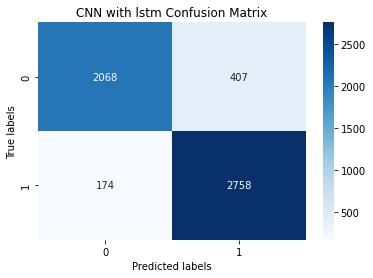

In [ ]:
from sklearn.metrics import confusion_matrix
cm_km1 = confusion_matrix(y_test, y_predict1)

ax = plt.subplot()  
sns.heatmap(cm_km1, annot=True, ax = ax, fmt='g', cmap='Blues') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('CNN with lstm Confusion Matrix') 